In [8]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from sympy import *
from scipy.integrate import quad
import TridiagonalMatrixHandler as tmh
%matplotlib notebook

# $$\frac{\partial u}{\partial t}=D\frac{\partial^2 u}{\partial x^2} + au(1-u/K) - σu;$$

$$F(u)=au^k_j\cdot(1-u^{k+1}_j/K(I(u)))- \sigma u^{k+1}_j$$
$$где\qquad K(I(u))=K + K_1I(u); \qquad I(u) = \int_0^1 u(x,t)dx.$$

In [16]:
K = 10
K1 = 1

print("D = " + str(tmh.D) + ' a = ' + str(tmh.a) + " σ = " + str(tmh.deathKoeff)
      + " K = " + str(K) + " K1 = " + str(K1))

D = 0.5 a = 2.0 σ = 1.0 K = 10 K1 = 1


In [9]:
def kFunction(i, u1):
    return K + K1 * quad(lambda x: u1, 0, tmh.L)[0]

u, x = tmh.createAndSolveMatrix(kFunction)

<IPython.core.display.Javascript object>


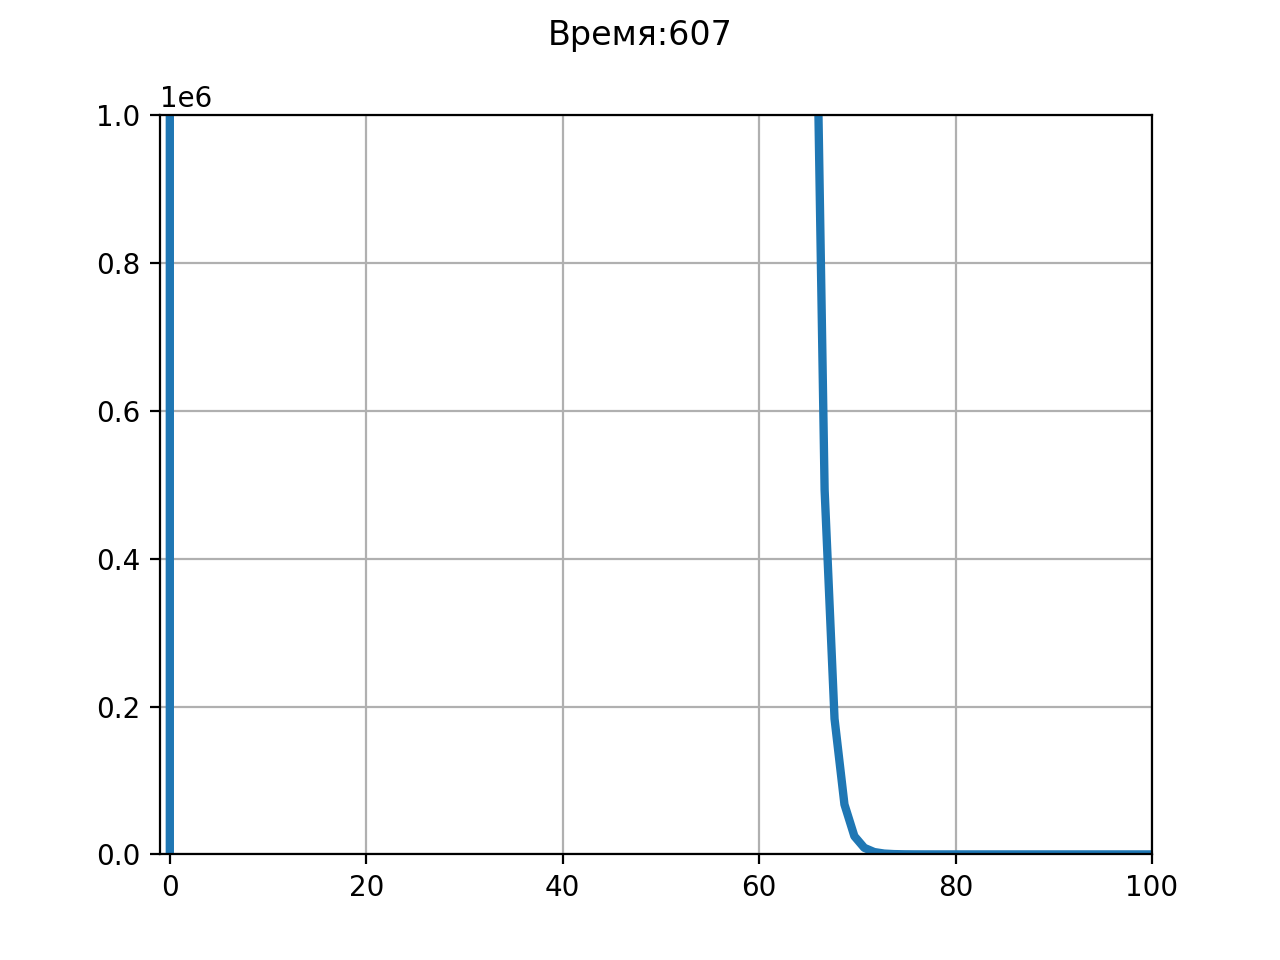

In [10]:
fig = plt.figure(facecolor='white')
ax = plt.axes(xlim=(-1, tmh.L), ylim=(0, 1000000) )
line, = ax.plot([ ], [ ], lw=3)
def redraw(i):
    line.set_data(x, u[:,i])
    string = 'Время:'+str(i)
    plt.suptitle(string)
anim = animation.FuncAnimation(fig,redraw,frames=tmh.KT,interval=100)
plt.grid(True)
plt.show()
